In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Bit Torrent

In this problem, we will reconsider aspects of problem 3 from THW3. 

### 1. a) Create a simulator

Create a function called `download_file` which performs a simulation of the download process described in the THW3. The function should take an argument, `m`, indicating the number of chunks into which the file is divided. At each step, any of the `m` chunks is equally likely to be downloaded, even if it has been previously downloaded (imagine that the only way to see which chunk is contained on a server to to download the chunk). The function should return an array called `first_seen` which contains the steps on which each chunk of the file was first seen. For example, if the 1st chunk was first seen on the 4th step, then the first element (at index 0) of the array should be assigned to 4. If the 2nd chunk was first seen on the 18th step, then the second element (at index 1) should be assigned to 18. And so on.

Run the simulated function a large number (e.g. $N=50000$) times with $m=10$, and save the results in a $N \times m$ numpy array.

In [3]:
def download_file(m=10):
    # while not all the chunks have been seen
    # choose a random chunk 
    # have a variable counting which step we are on
    # if we haven't seen it before, add the step we saw it to seen[chunk - 1]
    all_seen = False
    step = 1
    seen = np.zeros(m)
    while (not all_seen):
        choices = np.arange(1, m+1, 1) # [1,2,3,4,5,6,7,8,9,10] all the possible chunks
        chunk = np.random.choice(choices)
        if (seen[chunk-1] == 0): # if we haven't seen the chunk before
            seen[chunk - 1] = step
        if (not (0 in seen)): # we've seen everything if there are no more 0's in the array 
            all_seen = True
        step += 1
    return seen

# seen: [3, 5, 0, 0, 0, 0, 0, 0, 0]

In [14]:
download_file()

array([ 9.,  3., 15.,  8.,  4.,  7., 18.,  2., 29.,  1.])

In [13]:
N = 50000
m = 10
result = []
for _ in range(N):
    item = download_file(m)
    result.append(item)
result = np.asarray(result)
result.shape
result[:, 1:5]

array([[ 2.,  6., 35.,  8.],
       [22., 11.,  1.,  6.],
       [ 3.,  1., 17.,  2.],
       ...,
       [ 9.,  3., 15.,  2.],
       [ 5.,  1., 12.,  4.],
       [ 6.,  1., 10., 21.]])

### 1. b) Compare the theoretical and empirical distribution for time to see 1 chunk

Let $X$ be the step on which chunk number 1 is first seen. How is $X$ distributed? Use the samples from part a) to empircally estimate $P(X)$. Plot  the empirical distribution and the theoretical distribution together on the same graph, and confirm that they agree. 

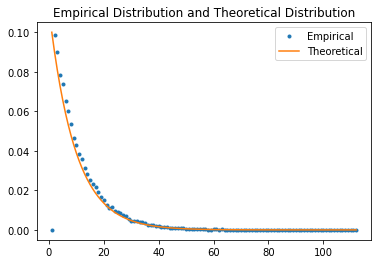

In [54]:

# Compare the empirical and theoretical distribution

# X is going to be the first column of the resulting nxm numpy array
X = result[:,0]

# find the probability that X = k
# P(X=1), P(X=2)
# find_p_k(1, X) --> P(X=1)
def find_p_k(k, X):
    # count the number of k's in x, divide by total 
    num_k = 0 # number of times we see that X = k
    for num in X:
        if (num == k): # each time we see k, we increment num_k 
            num_k += 1
    p_k = num_k / len(X)
    return p_k

k_list = np.arange(1, X.max()+1, 1)
pk_list = np.zeros(int(X.max())) 
for k in range(len(pk_list)): # all the posisble K's
    pk_list[k] = find_p_k(k,X)

    
plt.figure()
plt.plot(k_list, pk_list, '.')

# theoretical distribution
p = 1/m
f_k = [((1 - p) ** (k - 1)) * p for k in k_list]
plt.plot(k_list, f_k)

plt.title('Empirical Distribution and Theoretical Distribution')
plt.legend(['Empirical','Theoretical'])



X is a geometric distribution

### 1. c) Theoretical vs Empirical Expected Values

Empirically estimate the expected values of the following random variables: 
- X, the number of steps to see the first chunk
- Y, the number of steps to see the first and second chunks
- Z, the number of steps to see all chunks
 
For each empirical estimate, also give the theoretical value (You found the first two in your homework; the third was covered during the THW3 recitation)

In [186]:
# Compare the theoretical and empirical expected value
# find empirical expectation by multiplying our empirical dist to different values of X
# find theoretical expectation by multiplying our theoretical dist to different values of X


# Number of steps to see the first chunk
print('Theory (E[X]):')
print(10)
print('Empirical:')
print(X.mean())

print('\n')

# Number of steps to see the first and second chunks is the higher number between index 0 and index 1
Yint = result[:,0:2]
Y = np.zeros(len(Yint))
for index in range(len(Yint)):
    Y[index] = np.max(Yint[index])


print('Theory (E[Y]):')
print(30/2)
print('Empirical:')
print(np.mean(Y))
print('\n')

Z = np.zeros(50000)
for j in range(50000):
    Z[j] = np.max(result[j])

# Number of steps to see all chunks
print('Theory (E[Z]):')
print(29.2) # TODO: check this
print('Empirical:')
print(np.mean(Z))

Theory (E[X]):
10
Empirical:
10.05378


Theory (E[Y]):
15.0
Empirical:
15.0284


Theory (E[Z]):
29.2
Empirical:
29.27676


### 1. d) Memorylessness, pt. 1
In THW3, 3.c), you used the property, known as the "memoryless" property, of a geometric variable that 
$$P(X-t=s|X>t) = P(X=s).$$
We will know use the simulation to verify this property. 

As above, let $X$ be the number of steps needed to see the first chunk of a file. Suppose that you have downloaded the first 10 chunks of a file, and none of them is the first chunk. Let us define a new random variable, $\tilde{X}$, representing the number of remaining steps before we see the first chunk. Note that $\tilde{X} = X - 10$. Since we know that $X > 10$, the equation above tells us that 

$$P(\tilde{X}=s|X>10) = P(X-10=s|X>10) = P(X=s)$$

For each of the samples generated in part a), calculate $X$. Keep all of the samples with $X>10$ and discard the ones with $X\leq10$. Then, subtract 10 from each value of $X$. These new values represent a sample of $\tilde{X}$. Estimate the empirical mean of $\tilde{X}$. Plot the **pmf** of the samples of $\tilde{X}$. How do they compare to those of $X$?

In [77]:
X_ = X[X > 10] - 10
emp_mean = X_.mean()
print('Empirical mean of X~ is ',emp_mean)


Empirical mean of X~ is  10.015592101519376


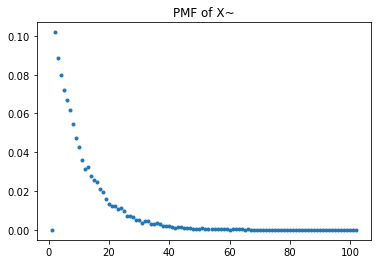

In [75]:
k_list = np.arange(1, X_.max()+1, 1)
pk_list = np.zeros(int(X_.max()))
for k in range(len(pk_list)): # all the posisble K's
    pk_list[k] = find_p_k(k,X_)
    
plt.figure()
plt.title('PMF of X~')
plt.plot(k_list, pk_list, '.')

The empirical mean and PMF of X~ match X, hence showing that the memoryless property is true.

### 1. e) Memorylessness, pt. 2

Let us now consider the random variable, $Y$, representing the number of steps needed to see both the first and second chunks. Let us check whether this random variable is memoryless. 

For each of the samples generated in part a), calculate $Y$. Keep all of the samples with $Y>10$ and discard the ones with $Y\leq10$. Then, subtract 10 from each value of $Y$. These new values represent a sample of $\tilde{Y}$. Plot the **pmf** of the samples of $\tilde{Y}$ and compare with the **pmf** of $Y$. Can you explain why this distribution is not memoryless?

In [182]:
# same procedure, now with Y
Y_ = Y[Y > 10] - 10
y_mean = np.mean(Y_)
print('Empirical mean of Y~ is ',y_mean)

# not memoryless because it has to "remember" that it saw the first value. 


Empirical mean of Y~ is  10.904239148792433


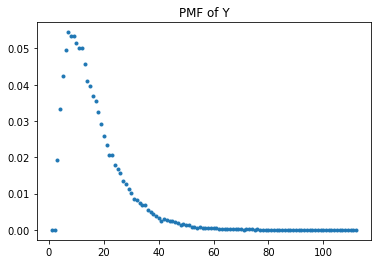

In [196]:
k_list = np.arange(1, Y.max()+1, 1)
pk_list = np.zeros(int(Y.max()))
for k in range(len(pk_list)): # all the posisble K's
    pk_list[k] = find_p_k(k,Y)
    
plt.figure()
plt.title('PMF of Y')
plt.plot(k_list, pk_list, '.')

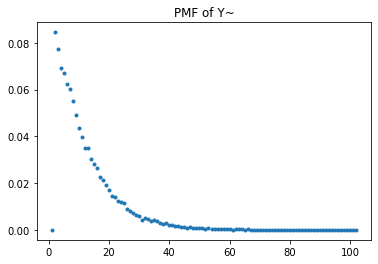

In [185]:
k_list = np.arange(1, Y_.max()+1, 1)
pk_list = np.zeros(int(Y_.max()))
for k in range(len(pk_list)): # all the posisble K's
    pk_list[k] = find_p_k(k,Y_)
    
plt.figure()
plt.title('PMF of Y~')
plt.plot(k_list, pk_list, '.')

In this case, the expectation and pmf of Y~ does not match Y. Hence, the memoryless property is not true for Y. The intuitive explanation for why Y is not memoryless is because the variable Y has to "keep track" or "remember" information about X, or seeing the first chunk. Hence, the output any given time is NOT only dependent on the input at that time and that the time elapsed is a factor, meaning that the system requires memory. 

# 2. Law of Large Numbers

Let $X_i$ be a sequence of i.i.d random variables. Given $n$ measurements of $X_i$, we calculate the sample mean of the random variable as 

$$
\bar{X}_n = \frac{1}{N}\sum_1^N X_i
$$

The law of large numbers deals with the convergence of the sample mean to the expecation of the random variable $X_i$ as $n$ gets large. 

$$
\bar{X}_n \rightarrow E[X] \quad \text{as} \quad n \rightarrow \infty. 
$$

In this problem, we will consider the weak law of large numbers. The weak law of large numbers states that for any $\epsilon > 0$. 

$$
\lim_{n\rightarrow\infty} P(|\bar{X}_n - E[X]| > \epsilon) = 0
$$

This is known as convergence in probability. In words, it means that the probability that $\bar{X}_n$ is any positive distance from $E[X]$ becomes arbitrarily small as $n$ becomes large. In mathematical terms, it means that for any $\epsilon > 0$ and $\delta > 0$, there exists an integer $N$ such that if $n \geq N$, then

$$
P(|\bar{X}_n - E[X]| > \epsilon) < \delta
$$

or, equivalently,

$$P(|\bar{X}_n - E[X]| \leq \epsilon) \geq 1-\delta$$

We can write $N = N(\epsilon,\delta)$ to emphasize that N is dependent on both $\epsilon$ and $\delta$. To see why, consider the following: For a fixed $n$, $\bar{X}_n$ will naturally have a certain amount of variability because it is a function of a finite random sample. Because of this variability, if we keep $n$ fixed and reduce $\epsilon$, the probability that $\bar{X}_n$ will be more than $\epsilon$ away from $E[X]$ increases. To keep $P(|\bar{X}_n - E[X]| > \epsilon)$ below $\delta$, we thus have to reduce the variability by increasing $n$.  

In this problem, we will empirically estimate the relationship between $N, \epsilon$, and $\delta$, for a few distributions.

### 2. a) Uniform Distribution
For a fixed value of $\epsilon$, we wish to find a relationship between $\delta$ and $N$. The above definitions imply that for every value of $\epsilon$, there exists a value of $N$. But we can also go in the reverse direction. For every value of $N$, we can find a corresponding $\delta$ such that $P(|\bar{X}_n - E[X]| > \epsilon) < \delta$ if $n \geq N$. Under the assumption that $P(|\bar{X}_n - E[X]| > \epsilon)$ decreases monotonically as $n$ increases, we can do this by just finding $\delta$ such that $P(|\bar{X}_n - E[X]| > \epsilon) = \delta$ when $n = N$.

So, how do we estimate $P(|\bar{X}_n - E[X]| > \epsilon)$ for a fixed value of $n$? As we have been doing, we need to sample $\bar{X}_n$ a large number of times, represented by $M$. We then estimate $P(|\bar{X}_n - E[X]| > \epsilon)$ as 

$$P(|\bar{X}_n - E[X]| > \epsilon) \approx \frac{\text{count}(|\bar{X}_n - E[X]| > \epsilon)}{M}$$

Write a function called `get_deltas` to estimate $\delta = P(|\bar{X}_n - E[X]| > \epsilon)$ for $n \in \{1,2,...,\text{max_n}\}$. Then use the function to calculate the relationship between $N$ and $\delta$ for $\epsilon \in \{0.1,0.05,0.01\}$. Create a plot which displays the relationship for each value of $\epsilon$. 

Use your plot to answer the following questions:
- How many samples are needed in order to have at least a 50% probability that our sample mean is within 0.01 of the true mean? Within 0.05 of the true mean?
- How many samples do we need in order for the sample mean to fall within 0.05 of the true mean with 80% probability? 90% probability?

In [92]:
# Uniform Distribution

def empirical_mean(dist,n=1000):
    # we are assuming that dist = np.random.uniform()
    v = dist(size = n) # array containing n samples distributed according to dist
    mu = np.mean(v)
    return mu
    

def get_deltas(mu,dist,eps=0.1,M=1000,max_n=500):
    deltas = []
    for n in range(1, max_n):
        sample_means = np.array([empirical_mean(dist, n=n) for _ in range(M)])
        
        # check if the difference is greater than epsilon 
        delta = np.mean((np.abs(sample_means - mu) > eps).astype(np.float))
        deltas.append(delta)
    return deltas
        
mu = 0.5
dist = lambda size : np.random.uniform(0, 1, size = size) # lambda, inline function
eps = 0.05
deltas = get_deltas(mu,dist, eps)
deltas2 = get_deltas(mu, dist, eps = 0.01)



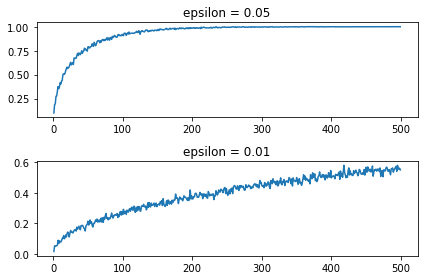

In [100]:
fig = plt.figure()

max_n = 500
n = np.arange(1, max_n)
plt.subplot(2,1,1)
plt.title('epsilon = 0.05')
plt.plot(n, 1 - np.array(deltas))

plt.subplot(2,1,2)
plt.title('epsilon = 0.01')
plt.plot(n, 1 - np.array(deltas2))
fig.tight_layout()
# explore the curve for other values of epsilon

a) The graph shows that we need approximately 400 samples to have at least a 50% probability of our sample mean being within 0.01 of the true mean. To have 50% probability of being within 0.05 of the true mean, we need approximately 15 samples. 

b) To fall within 0.05 of the true mean with 80% probability, we need around 80-90 samples, estimating from the graph. For 90% probability, we need about 100 samples.

### 2. b) Bernoulli Distribution

Repeat part a) for a Bernoulli distribution with $p = 0.5$ and $p = 0.1$. As a reminder, a Bernoulli distribution gives 1 with probability $p$ and 0 with probability $1-p$. Explain any trends that you observe. 

In [144]:
# Uniform Distribution

def empirical_mean(dist,n=1000):
    # we are assuming that dist = np.random.uniform()
    v = dist(size = n) # array containing n samples distributed according to dist
    mu = np.mean(v)
    return mu
    

def get_deltas(mu,dist,eps=0.1,M=1000,max_n=500):
    deltas = []
    for n in range(1, max_n):
        sample_means = np.array([empirical_mean(dist, n=n) for _ in range(M)])
        
        # check if the difference is greater than epsilon 
        delta = np.mean((np.abs(sample_means - mu) > eps).astype(np.float))
        deltas.append(delta)
    return deltas
        
mu = 0.5
dist = lambda size : np.random.choice([0,1],p=[0.5,0.5], size = size) # lambda, inline function
eps = 0.05
deltas3 = get_deltas(mu,dist, eps)
deltas4 = get_deltas(mu, dist, eps = 0.01)



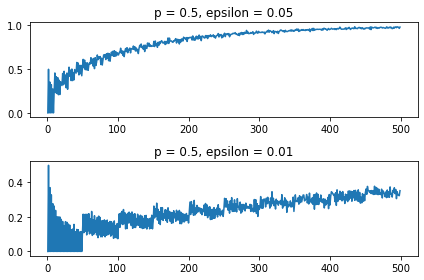

In [149]:
fig = plt.figure()

max_n = 500
n = np.arange(1, max_n)
plt.subplot(2,1,1)
plt.title('p = 0.5, epsilon = 0.05')
plt.plot(n, 1 - np.array(deltas3))

plt.subplot(2,1,2)
plt.title('p = 0.5, epsilon = 0.01')
plt.plot(n, 1 - np.array(deltas4))
fig.tight_layout()
# explore the curve for other values of epsilon

a) We need approximately 600-700 samples for 50% probability of being within 0.01. To be within 0.05 with 50% probability, we need about 50 samples.

b) To fall within 0.05 with 80% probability we need approximately 220 samples. For 90%, about 320. 

In [194]:
# Uniform Distribution

def empirical_mean(dist,n=1000):
    # we are assuming that dist = np.random.uniform()
    v = dist(size = n) # array containing n samples distributed according to dist
    mu = np.mean(v)
    return mu
    

def get_deltas(mu,dist,eps=0.1,M=1000,max_n=500):
    deltas = []
    for n in range(1, max_n):
        sample_means = np.array([empirical_mean(dist, n=n) for _ in range(M)])
        
        # check if the difference is greater than epsilon 
        delta = np.mean((np.abs(sample_means - mu) > eps).astype(np.float))
        deltas.append(delta)
    return deltas
        
mu = 0.1
dist = lambda size : np.random.choice([0,1],p=[0.9,0.1], size = size) # lambda, inline function
eps = 0.05
deltas3 = get_deltas(mu,dist, eps)
deltas4 = get_deltas(mu, dist, eps = 0.01)

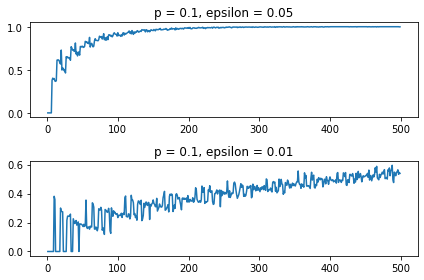

In [195]:
fig = plt.figure()

max_n = 500
n = np.arange(1, max_n)
plt.subplot(2,1,1)
plt.title('p = 0.1, epsilon = 0.05')
plt.plot(n, 1 - np.array(deltas3))

plt.subplot(2,1,2)
plt.title('p = 0.1, epsilon = 0.01')
plt.plot(n, 1 - np.array(deltas4))
fig.tight_layout()


a) We need approximately 450 samples for 50% probability of being within 0.01. To be within 0.05 with 50% probability, we need about 20 samples.

b) To fall within 0.05 with 80% probability we need approximately 85 samples. For 90%, about 110 samples. 

It seems that with a lower p, (p=0.1) we generally require fewer samples to get to the same level of closeness to epsilon. 

# 3. Credible Intervals

Suppose that, in the previous investment problem, the fund returns $(1+a)x$ with probability $p$ and $(1-b)x$ with probability $1-p$, where $p$ is unknown. We wish to estimate $p$ from the actual performance of the investment over time. But we also want to provide some statement about the certainty of our answer. One way of doing this is to use credible intervals. 

### 3. a) Load data
Load the variable `S` from the provided .npy file using the following code.

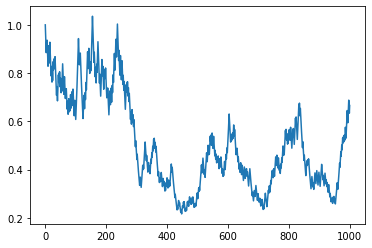

In [46]:
S = np.load('investment.npy')
plt.plot(S)

### 3. b) Find $P(S|p)$
Let the sequence of returns from the investment account be denoted $S$. $S$ is of the form 

$$
S = s_1s_2...s_n
$$

where $s_i$ indicates the amount of money returned by the investment after the $i$'th period. Write a function which evaluates $P(S|p)$. That is, given the probability of returning $(1+a)x$ vs. $(1-b)x$, the function should return the probability that the particular sequence $S$ is returned by the investment (for large $n$, this will always be a very small number if $p\neq1$). 

In [47]:
def p_S_given_p(S,p):
    
    pass

### 3. c) Find $P(p|S)$

It is known a priori that $p \in [0,1]$. Divide up the range $[0,1]$ into a finite number of bins given by `n_p`. Let $H_i$ denote the $i$'th bin. 

Using Bayes' rule and your function from part b), write a function which gives the probability that $p \in H_i$ for each $i \in \{1,...,n_p\}$. To make this tractable, you should approximate that $p$ can only take a single value per bin. 


In [50]:
def p_p_given_S(S,n_p=100):

    pass

### 3. d) Credible intervals

Using your function from part c), calculate the distribution of $P(p|S)$. Restrict the portion of S that you consider to the first 10 samples. Repeat with the first 100, 500, and 1000 samples. Plot the distributions, appropriately labeled, on a single graph. 

Next, we will use each of the distributions to calculate credible intervals for $p$. A credible interval is an interval on $[0,1]$ which will contain $p$ with 90% probability. This interval is not necessarily unique. We ask for the interval which is 'centered' in the sense that there is a 5% probability that $p$ lies on either side of the interval. To find this interval, calculate the cumulative distribution function (CDF) associated with each of the distributions that you found. Then, find the value of $p$ which is closest to the 5% and 95% points on the CDF. 

(Note that a *credible interval* is not the same as the similarly named *confidence interval*. A confidence interval has a more nuanced interpretation based on frequentist statistics: given a fixed $p$, a 90% confidense interval constructed from a sample will contain $p$ 90% of the time. This is different from saying that the interval will contain $p$ with 90% probability.)